In [67]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
%matplotlib inline

In [68]:
countryCode_toName = {
    1: "India",
    14: "Australia",
    30: "Brazil",
    37: "Canada",
    94: "Indonesia",
    148: "New Zealand",
    162: "Phillipines",
    166: "Qatar",
    184: "Singapore",
    189: "South Africa",
    191: "Sri Lanka",
    208: "Turkey",
    214: "UAE",
    215: "United Kingdom",
    216: "United States",
}

In [ ]:
def number_of_cusines(temp):
    #print (temp)
    return len(temp.split())

In [69]:
data = pd.read_csv("data/zomato.csv", encoding = "ISO-8859-1")
data['Country'] = data['Country Code'].apply(lambda x: countryCode_toName[x])
data.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
4022,4356,T.K'S Oriental Grill - Hyatt Regency,1,New Delhi,"Hyatt Regency, Bhikaji Cama Place, New Delhi","Hyatt Regency, Bhikaji Cama Place","Hyatt Regency, Bhikaji Cama Place, New Delhi",77.185331,28.569040,"Japanese, Thai, Sushi",...,Yes,No,No,No,4,3.9,Yellow,Good,290,India
5316,301692,Breadz,1,New Delhi,"Below Canara Bank, A Block Market, Mayur Vihar...",Mayur Vihar Phase 2,"Mayur Vihar Phase 2, New Delhi",77.296003,28.617042,"Bakery, Fast Food",...,No,Yes,No,No,1,3.3,Orange,Average,48,India
3548,201,Domino's Pizza,1,New Delhi,"18/27, East Patel Nagar Market, East Patel Nag...",East Patel Nagar,"East Patel Nagar, New Delhi",77.172620,28.645340,"Pizza, Fast Food",...,No,No,No,No,2,3.5,Yellow,Good,119,India
2233,18396424,Madras Coffee House,1,Gurgaon,"Unit 7, SEZ Block 4 Aminity, Unitech Infospace...","Unitech Infospace, Sector 21, Gurgaon","Unitech Infospace, Sector 21, Gurgaon, Gurgaon",77.072051,28.510369,South Indian,...,No,No,No,No,1,3.0,Orange,Average,4,India
2721,18446396,Nirula's Ice Cream,1,New Delhi,"Shop 26, Central Market, Deep Complex, Ashok V...",Ashok Vihar Phase 1,"Ashok Vihar Phase 1, New Delhi",77.172323,28.694039,"Ice Cream, Desserts",...,No,No,No,No,1,0.0,White,Not rated,0,India


In [108]:
labels = list(data.Country.value_counts().index)
values = list(data.Country.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Countries",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

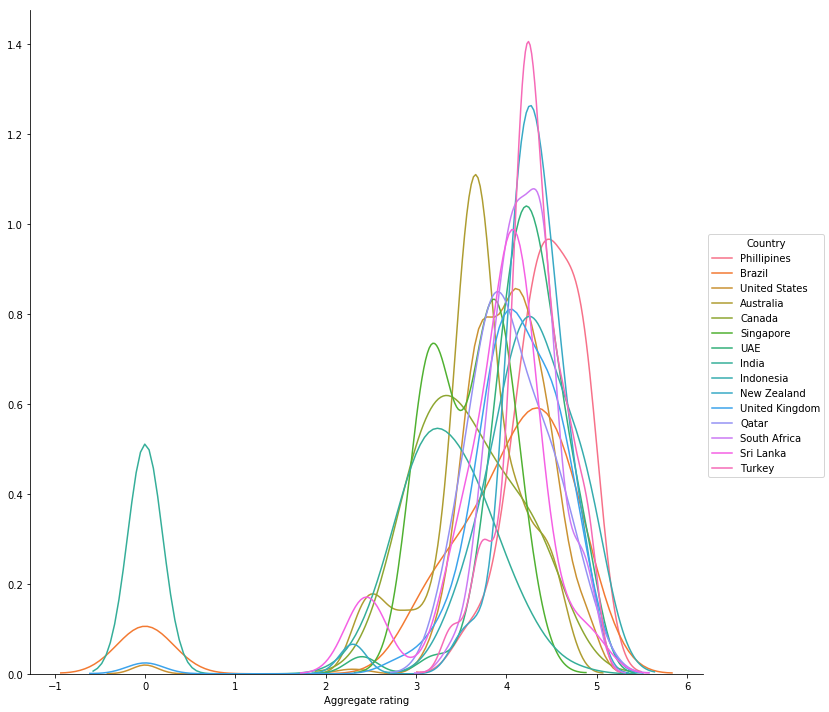

In [122]:
g = sns.FacetGrid(data, hue='Country', size=10)
g.map(sns.kdeplot, "Aggregate rating")
g.add_legend()

In [170]:
data.Cuisines.fillna("zero", inplace=True)
data['Number of Cusines Offered'] = data.Cuisines.apply(number_of_cusines)

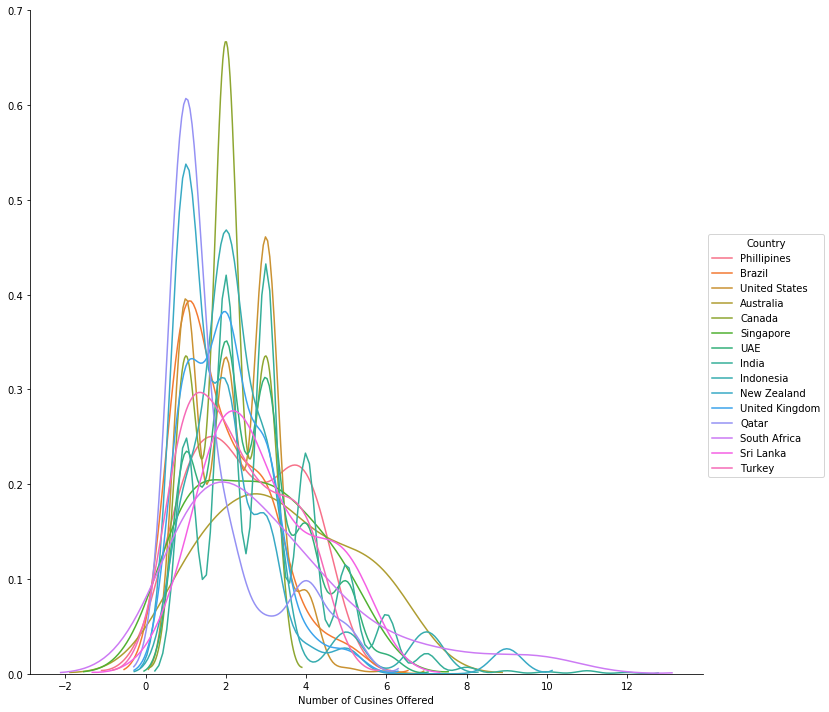

In [174]:
g = sns.FacetGrid(data, hue='Country', size=10)
g.map(sns.kdeplot, "Number of Cusines Offered")
g.add_legend()

In [171]:
data_india = data.loc[data.Country == "India"]

In [200]:
ind_city_ratings = data_india[['Aggregate rating','City']].groupby('City').mean().sort_values('Aggregate rating', 
                                                                           ascending=False).reset_index()
ind_city_ratings.columns = ['City','Average Rating']
ind_city_ratings = ind_city_ratings.loc[ind_city_ratings.City.isin(['New Delhi','Gurgaon','Noida',
                                                 'Faridabad'])].reset_index(drop=True)

trace2 = go.Bar(x=ind_city_ratings.City,
               y=ind_city_ratings['Average Rating'],)

,City,Average Rating
0,Gurgaon,2.651431
1,New Delhi,2.438845
2,Noida,2.036204
3,Faridabad,1.866932


In [185]:
data_india.City.value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Lucknow           21
Guwahati          21
Ahmedabad         21
Amritsar          21
Bhubaneshwar      21
Mangalore         20
Pune              20
Kanpur            20
Varanasi          20
Surat             20
Mysore            20
Allahabad         20
Bhopal            20
Mumbai            20
Ludhiana          20
Agra              20
Ranchi            20
Vadodara          20
Bangalore         20
Vizag             20
Coimbatore        20
Kochi             20
Dehradun          20
Chennai           20
Indore            20
Jaipur            20
Patna             20
Aurangabad        20
Nashik            20
Kolkata           20
Nagpur            20
Puducherry        20
Goa               20
Hyderabad         18
Chandigarh        18
Secunderabad       2
Panchkula          1
Mohali             1
Name: City, dtype: int64